#### [ 개발 주제 : 꽃 받침/잎 길이에 따른 너비 예측 모델 ]
- 데이터셋 : iris.csv
	* 피처/특성/데이터 : 길이 Length 컬럼
	* 타겟/정답/레이블 : 너비 Width 컬럼
- 학습종류 : 지도학습 - 회귀(Regression)
- 알고리즘 : 데이터셋 분석 후 결정

[1] 모듈 로딩 및 데이터 준비 <hr>

In [57]:
## [1-1] 모듈로딩 - 데이터 분석용
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
## [1-2] 데이터 준비
DATA = '../data/iris.csv'

In [59]:
## - 데이터 로딩
SepalDF = pd.read_csv(DATA, usecols=[0, 1], engine='python')
SepalDF

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


[2] 데이터 분석 - 탐색적 분석 <hr>

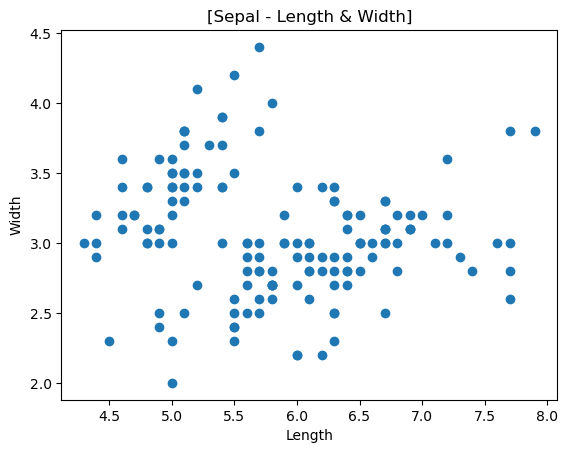

In [ ]:
## - 길이와 너비의 분포 시각화
plt.plot(SepalDF['sepal.length'], SepalDF['sepal.width'], 'o')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('[Sepal - Length & Width]')
plt.show()

[3] 학습 진행 <hr>

In [61]:
##  학습관련 모듈로딩
from sklearn.linear_model import LinearRegression						## ML 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error 	## 성능평가 관련 모듈
from sklearn.model_selection import train_test_split					## 데이터셋 분리 관련 모듈

In [62]:
## [3-1] 데이터셋 준비 => 학습용, 검증용 ,테스트용
## - 학습용   : 모델 학습 즉, 규칙과 패턴 찾기 위해 사용되는 데이터셋
## - 검증용   : 모델 학습 진행이 제대로 되고 있느닞 확인용 데이터셋
## - 테스트용 : 학습 완료 후 검사용 데이터셋

## - 전체 데이터셋 => 학습용 : 테스트용 = 70:30 또는 80:20
feature = SepalDF[['sepal.length']]
target = SepalDF['sepal.width']
print(f'feature => {feature.ndim}D target => {target.ndim}D')

feature => 2D target => 1D


In [63]:
# 학슴용 : 테스트용 = 80:20
X1_train, X1_test, y1_train, y1_test = train_test_split(feature,
													target,
													test_size=0.2,
													random_state=20)

print(f'X1_train => {X1_train.shape}, X1_test => {X1_test.shape}')
print(f'y1_train => {y1_train.shape}, y1_test => {y1_test.shape}')

X1_train => (120, 1), X1_test => (30, 1)
y1_train => (120,), y1_test => (30,)


In [64]:
# 학습용 : 테스트용 = 80:20
X1_train, X1_val, y1_train, y1_val = train_test_split(	X1_train, 
														y1_train, 
														test_size=0.2,
														random_state=10)

print(f'X1_train => {X1_train.shape},  X1_val => {X1_val.shape}, X1test => {X1_test.shape}')
print(f'y1_train => {y1_train.shape}, y1_val => {y1_val.shape}, y1_test => {y1_test.shape}')

X1_train => (96, 1),  X1_val => (24, 1), X1test => (30, 1)
y1_train => (96,), y1_val => (24,), y1_test => (30,)


In [65]:
## [3-2] 학습 진행 => 알고리즘객체 생성
SepalModel = LinearRegression()

In [66]:
print(SepalDF.dtypes)  # 데이터 타입 확인
print(SepalDF.head())  # 학습 데이터 일부 확인

sepal.length    float64
sepal.width     float64
dtype: object
   sepal.length  sepal.width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6


In [67]:
## [3-3] 학습 진행 => 학습용 데이터셋 사용
SepalModel.fit(X1_train, y1_train)

LinearRegression()

In [68]:
## 모델 파라미터 확인
print(f'coef_ : {SepalModel.coef_}, intercept_ : {SepalModel.intercept_}')

coef_ : [-0.03146067], intercept_ : 3.2723314606741574


In [69]:
y1_pred = SepalModel.predict(X1_test)

In [70]:
print(f'SepalModel MSE : {mean_squared_error(y1_test, y1_pred):.4f}')

SepalModel MSE : 0.1498


입력값 예측

In [73]:
print('(sepal.length -> sepal.width) 예측')
sepal_length = float(input('예측할 sepal.length 값 입력 :'))
sepal_pred = SepalModel.predict([[sepal_length]])
print(f'sepal.width 예측: {sepal_pred[0]:.4f}')

(sepal.length -> sepal.width) 예측
sepal.width 예측: 2.8319


c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
